In [1]:
from components.baseline_ifum import BaselineIFUM
from components.baseline_lof import BaselineLOF
from components.baseline_ocsvm import BaselineOCSVM
from components.detection import Detection
from components.general_operations import GeneralOp
from components.replication import Replication
from components.tampering import Tampering


general = GeneralOp()
replication =  Replication()
tampering = Tampering()

detection = Detection()
ifum_baseline = BaselineIFUM()
lof_baseline = BaselineLOF()
ocsvm_baseline = BaselineOCSVM()



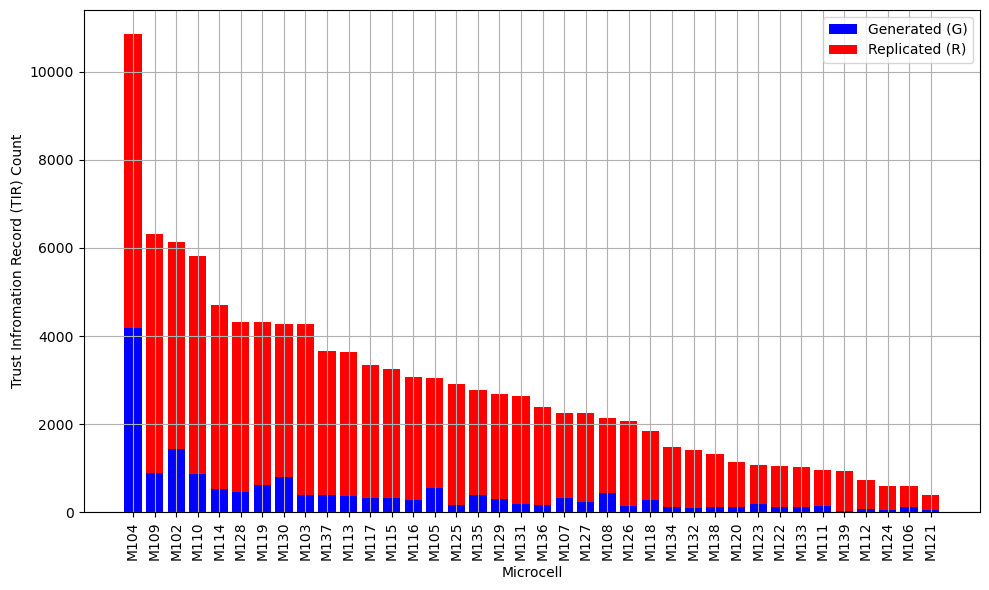

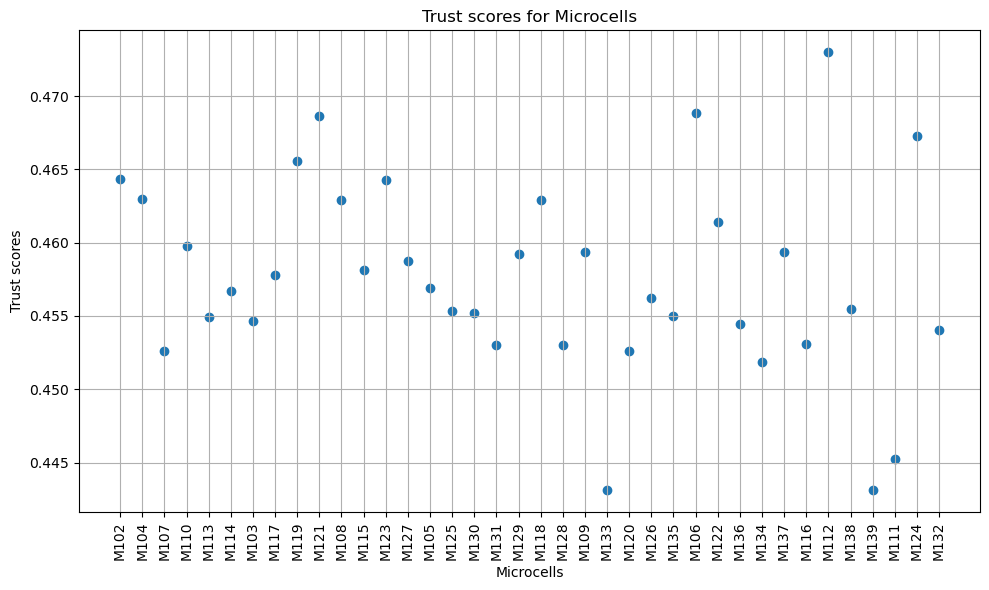

38


In [2]:
dfin = general.open_file_csv('data_alg_16000.csv')
dfin = general.slice_df(dfin,['serviceid','providerid','microcell','timestamp','speed','latency','bandwidth','coverage','reliability','security','currect_microcell'])
dfin
dfin=general.add_a_column_with_a_value(dfin,'origin','G')
dfin=general.add_a_column_with_a_value(dfin,'true_label','C')
data_list = general.dataframe_devide_to_microcell_dictionary(dfin)
data_rep=replication.replicate_totally(data_list,dfin)
replication.visualize_samples_per_microcell(data_rep)

merged_df = general.dictionary_to_merged_df(data_rep)

general.save_file(merged_df,'replicated_source.xlsx')
data_with_scores = general.trust_score_calculation(data_rep,[0.3,0.1,0.2,0.1,0.1,0.2])
general.visualize_data_one_value(data_with_scores)
print(len(dfin['microcell'].unique()))


In [ ]:
test1 = tampering.tamper_data1(data_with_scores,100,'N2',sig=[0.3,0.1,0.2,0.1,0.1,0.2])
tampred_data_with_scores1 = general.trust_score_calculation(test1,[0.3,0.1,0.2,0.1,0.1,0.2])

test2 = tampering.tamper_data1(data_with_scores,100,'K3',sig=[0.3,0.1,0.2,0.1,0.1,0.2])
tampred_data_with_scores2 = general.trust_score_calculation(test2,[0.3,0.1,0.2,0.1,0.1,0.2])

test3 = tampering.tamper_data1(data_with_scores,100,'S2',sig=[0.3,0.1,0.2,0.1,0.1,0.2])
tampred_data_with_scores3 = general.trust_score_calculation(test3,[0.3,0.1,0.2,0.1,0.1,0.2])
        
general.visualize_data_four_values(data_with_scores,tampred_data_with_scores1,tampred_data_with_scores2,tampred_data_with_scores3)


In [4]:
import numpy as np


dic_score_list = {}
sp_percentage = 10
tampering_level = 'N2'


for j in range(1, 5):
    list_scores = []
    for i in range(5): 
        print(str(j) + "  " + str(i))
        
        # Tamper data
        # tampered_data_temp = tampering.tamper_data1(data_with_scores, (sp_percentage * j) / 2, tampering_level, sig=[0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        
        # Calculate trust scores
        # tampered_data = general.trust_score_calculation(tampered_data_temp, [0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        in1 = general.trust_score_calculation(tampering.tamper_data1(data_with_scores, (sp_percentage * j) / 2, tampering_level, sig=[0.3, 0.1, 0.2, 0.1, 0.1, 0.2]), [0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        in2= general.trust_score_calculation(tampering.tamper_data1(data_with_scores, (sp_percentage * j) / 2, tampering_level, sig=[0.3, 0.1, 0.2, 0.1, 0.1, 0.2]), [0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        in3= general.trust_score_calculation(tampering.tamper_data1(data_with_scores, (sp_percentage * j) / 2, tampering_level, sig=[0.3, 0.1, 0.2, 0.1, 0.1, 0.2]), [0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        in4 = general.trust_score_calculation(tampering.tamper_data1(data_with_scores, (sp_percentage * j) / 2, tampering_level, sig=[0.3, 0.1, 0.2, 0.1, 0.1, 0.2]), [0.3, 0.1, 0.2, 0.1, 0.1, 0.2])
        # Detect tampered records using the original baseline
        data_detected_tda = detection.detect_tampered_records(dfin, in1)
        data_detected_ifum = ifum_baseline.baseline_detection(in2)
        data_detected_lof = lof_baseline.baseline_detection(in3)
        data_detected_ocsvm = ocsvm_baseline.baseline_detection(in4)
        
        # Calculate scores for both baselines
        list_scores.append([
            detection.accuracy(data_detected_tda['true_label'], data_detected_tda['label']),
            detection.precision(data_detected_tda['true_label'], data_detected_tda['label'], 'T'),
            detection.recall(data_detected_tda['true_label'], data_detected_tda['label'], 'T'),
            detection.accuracy(data_detected_ifum['true_label'], data_detected_ifum['label']),
            detection.precision(data_detected_ifum['true_label'], data_detected_ifum['label'], 'T'),
            detection.recall(data_detected_ifum['true_label'], data_detected_ifum['label'], 'T'),
            detection.accuracy(data_detected_lof['true_label'], data_detected_lof['label']),
            detection.precision(data_detected_lof['true_label'], data_detected_lof['label'], 'T'),
            detection.recall(data_detected_lof['true_label'], data_detected_lof['label'], 'T'),
            detection.accuracy(data_detected_ocsvm['true_label'], data_detected_ocsvm['label']),
            detection.precision(data_detected_ocsvm['true_label'], data_detected_ocsvm['label'], 'T'),
            detection.recall(data_detected_ocsvm['true_label'], data_detected_ocsvm['label'], 'T')
        ])
    
    # Convert list to numpy array and calculate the average for each column
    data_array = np.array(list_scores)
    column_averages = np.mean(data_array, axis=0)
    dic_score_list[j] = column_averages


KeyboardInterrupt: 

In [ ]:
dic_score_list

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(dic_score_list, orient='index', columns=['Acc_tda', 'Pre_tda', 'Rec_tda','Acc_ifum', 'Pre_ifum', 'Rec_ifum','Acc_lof', 'Pre_lof', 'Rec_lof','Acc_ocsvm','Pre_ocsvm','Rec_ocsvm'])
df.to_excel('./data/naiv_1 .xlsx', index_label='Index')